In [98]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import seaborn as sb

# Первая часть

# 1 задание

In [99]:
doc=pd.read_excel("TABLE.xlsx", sheet_name='Volg')
doc.iloc[:,:7]

,Unnamed: 0,2005,2010,2015,2019,2020,2021
0,Приволжский федеральный округ,46.7,47.2,45.0,46.7,47.6,47.7
1,Республика Башкортостан,41.7,42.2,40.2,43.4,44.8,44.6
2,Республика Марий Эл,34.1,33.5,34.8,36.2,36.4,37.0
3,Республика Мордовия,51.4,51.8,53.7,53.4,54.6,56.0
4,Республика Татарстан,44.9,44.2,40.6,42.8,44.3,44.4
5,Удмуртская Республика,56.9,58.5,55.3,49.6,51.2,52.3
6,Чувашская Республика,47.6,47.6,49.3,49.5,50.6,51.6
7,Пермский край,55.1,54.2,49.2,50.6,50.4,49.2
8,Кировская область,46.3,48.9,44.4,48.5,49.7,49.5
9,Нижегородская область,44.5,47.6,47.4,48.3,48.4,49.3


In [100]:
selected_row = doc[doc.iloc[:, 0] == "Нижегородская область "]
selected_row


,Unnamed: 0,2005,2010,2015,2019,2020,2021,"Место,\nзанима- емое \nв Россий-ской Феде-рации 2021"
9,Нижегородская область,44.5,47.6,47.4,48.3,48.4,49.3,39


# 2 задание

In [101]:
names = [
    "Республика Башкортостан",
    "Республика Марий Эл",
    "Республика Мордовия",
    "Республика Татарстан",
    "Удмуртская Республика",
    "Чувашская Республика",
    "Пермский край",
    "Кировская область",
    "Нижегородская область ",
    "Оренбургская область",
    "Пензенская область",
    "Самарская область",
    "Саратовская область"
]

years = [2005, 2010, 2015, 2019, 2020, 2021]

data = {}

for name in names:
    selected_row = doc[doc.iloc[:, 0] == name]
    selected_row = selected_row.iloc[0, 1:7]
    values = selected_row.values
    data[name] = values

print(pd.DataFrame.from_dict(data, orient='index'))

                            0     1     2     3     4     5
Республика Башкортостан  41.7  42.2  40.2  43.4  44.8  44.6
Республика Марий Эл      34.1  33.5  34.8  36.2  36.4  37.0
Республика Мордовия      51.4  51.8  53.7  53.4  54.6  56.0
Республика Татарстан     44.9  44.2  40.6  42.8  44.3  44.4
Удмуртская Республика    56.9  58.5  55.3  49.6  51.2  52.3
Чувашская Республика     47.6  47.6  49.3  49.5  50.6  51.6
Пермский край            55.1  54.2  49.2  50.6  50.4  49.2
Кировская область        46.3  48.9  44.4  48.5  49.7  49.5
Нижегородская область    44.5  47.6  47.4  48.3  48.4  49.3
Оренбургская область     50.2  52.2  46.9  46.4  46.5  45.9
Пензенская область       37.0  39.2  38.9  42.6  45.0  46.1
Самарская область        48.2  47.7  45.4  48.8  49.4  49.2
Саратовская область      52.7  52.0  48.6  50.8  51.4  51.6


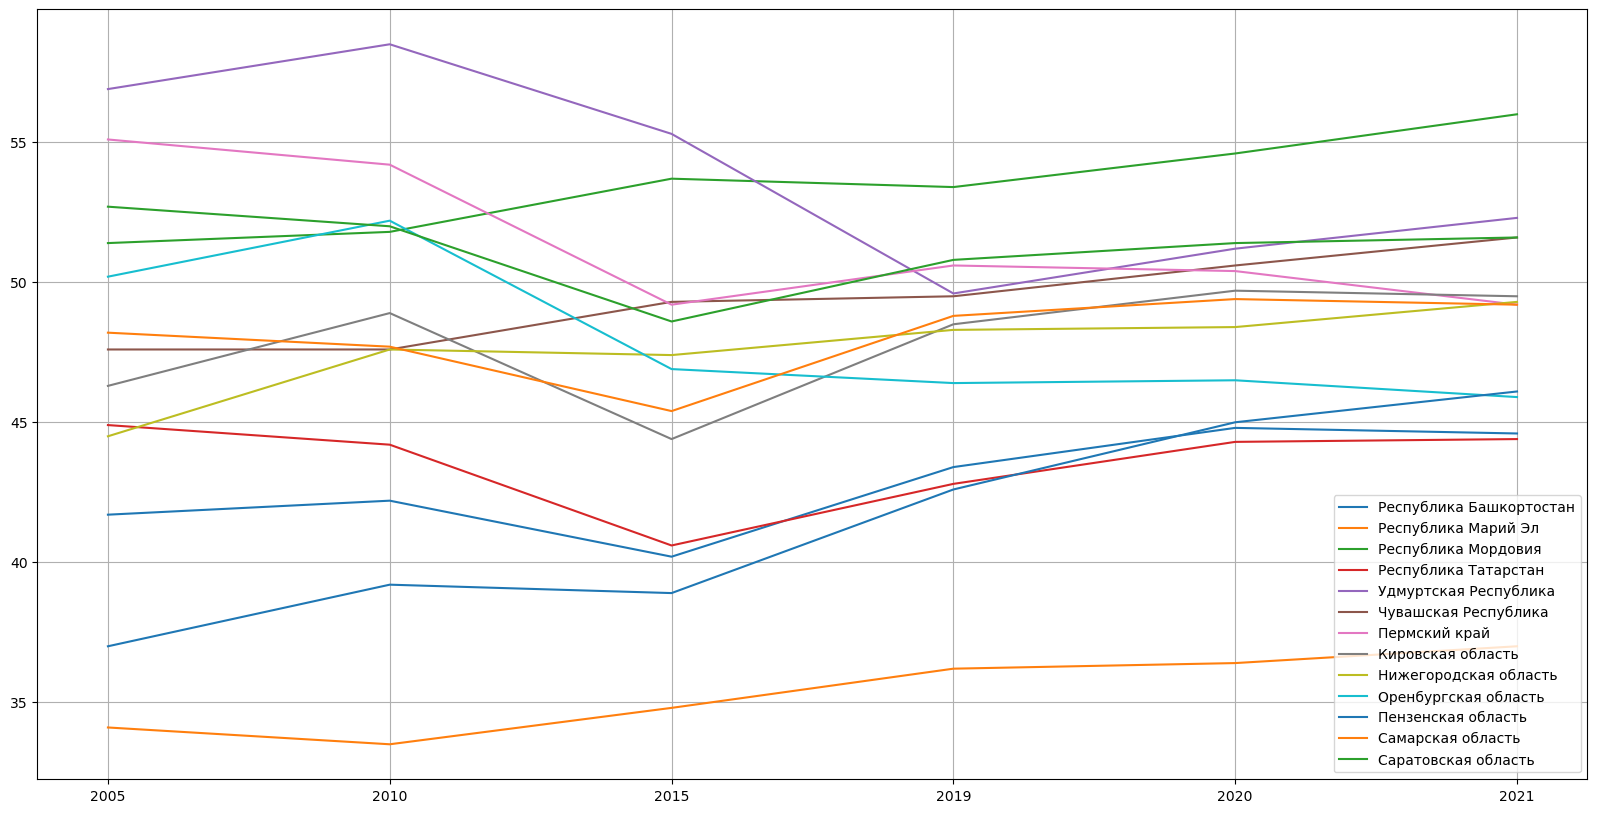

In [102]:
plt.figure(figsize=(20, 10))

for name in names:
    plt.plot(data.get(name))
    

plt.xticks(range(len(years)), years)
plt.grid()
plt.legend(names)

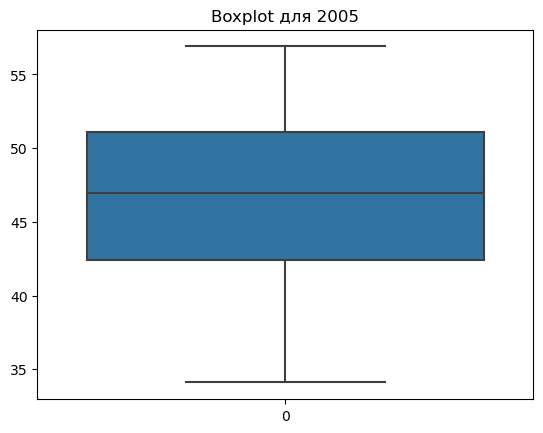

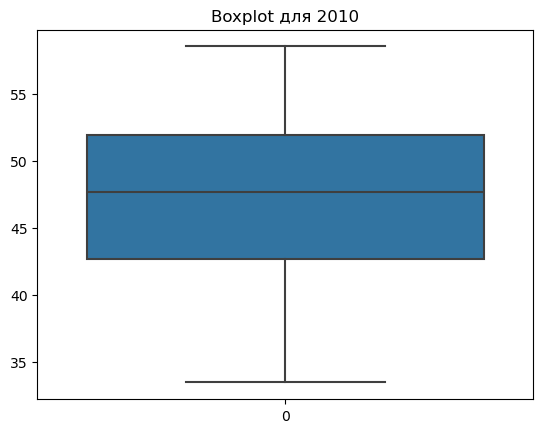

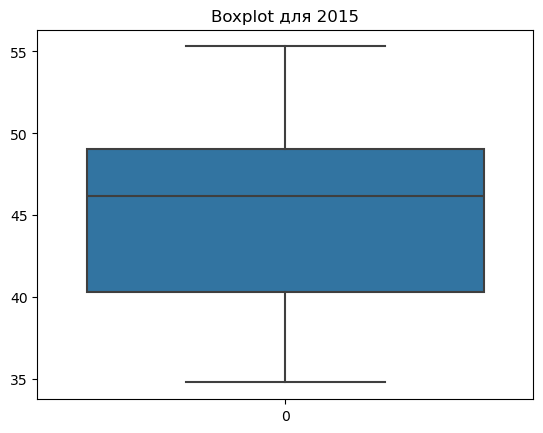

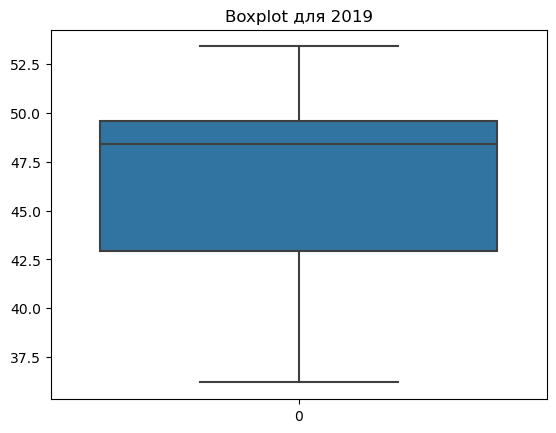

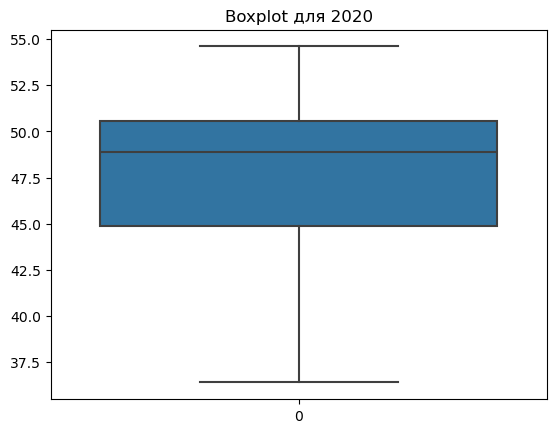

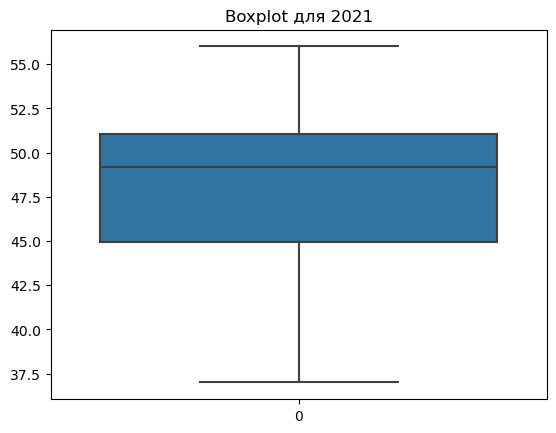

In [103]:
for year in years: 
    values = doc[year].iloc[1:].values
    sb.boxplot(values) 
    plt.title(f"Boxplot для {year}") 
    plt.show()

# 3 задание

In [104]:
for year in years:
    temp = doc[year].values
    mean = np.mean(temp)
    std_dev = np.std(temp)
    min_val = np.min(temp)
    max_val = np.max(temp)
    q1, q2, q3 = np.percentile(temp, [25, 50, 75]) 
    print("Для года: ", year)
    print("Среднее значение: ", mean)
    print("Стандартное отклонение: ",std_dev)
    print("Минимальное значение: ",min_val)
    print("Максимальное значение: ",max_val)
    print("Первый квартиль (Q1): ",q1)
    print("Второй квартиль (медиана, Q2): ",q2)
    print("Третий квартиль (Q3): ",q3)
    print("\n")

Для года:  2005
Среднее значение:  46.186666666666675
Стандартное отклонение:  6.6109874871728165
Минимальное значение:  34.1
Максимальное значение:  56.9
Первый квартиль (Q1):  43.1
Второй квартиль (медиана, Q2):  46.7
Третий квартиль (Q3):  50.8


Для года:  2010
Среднее значение:  46.866666666666674
Стандартное отклонение:  6.60491399557094
Минимальное значение:  33.5
Максимальное значение:  58.5
Первый квартиль (Q1):  43.2
Второй квартиль (медиана, Q2):  47.6
Третий квартиль (Q3):  51.9


Для года:  2015
Среднее значение:  45.24666666666666
Стандартное отклонение:  5.534722717133675
Минимальное значение:  34.8
Максимальное значение:  55.3
Первый квартиль (Q1):  40.400000000000006
Второй квартиль (медиана, Q2):  45.4
Третий квартиль (Q3):  48.900000000000006


Для года:  2019
Среднее значение:  46.673333333333325
Стандартное отклонение:  4.275896267320909
Минимальное значение:  36.2
Максимальное значение:  53.4
Первый квартиль (Q1):  43.099999999999994
Второй квартиль (медиана, Q2):

# 4 задание

In [105]:
from scipy.stats import shapiro
a = 0.015

print(f"H0: Распределение имеет нормальное распределение \n H1: Распределение имеет не нормальное распределение \n")
for year in years:
    statistic, p_value = shapiro(doc[year])
    print("P_value: ", p_value)
    if p_value > a:
        print(f"Гипотеза о нормальности распределения для {year} принимается.\n")
    else:
        print(f"Гипотеза о нормальности распределения для {year} отвергается.\n")

H0: Распределение имеет нормальное распределение 
 H1: Распределение имеет не нормальное распределение 

P_value:  0.6806039214134216
Гипотеза о нормальности распределения для 2005 принимается.

P_value:  0.7304678559303284
Гипотеза о нормальности распределения для 2010 принимается.

P_value:  0.8952837586402893
Гипотеза о нормальности распределения для 2015 принимается.

P_value:  0.2948887050151825
Гипотеза о нормальности распределения для 2019 принимается.

P_value:  0.35352823138237
Гипотеза о нормальности распределения для 2020 принимается.

P_value:  0.7857881188392639
Гипотеза о нормальности распределения для 2021 принимается.



# 5 задание

In [106]:
print("Тест Барллетта\nH0: Распределения имеют одинаковую дисперсию \n H1: Распределения не имеют одинаковую дисперсию \n")

statistic, p_value = stats.bartlett(doc[years[0]], doc[years[1]], doc[years[2]], doc[years[3]], doc[years[4]], doc[years[5]])
print(f"P-value: { p_value} \n")

if p_value > a:
    print("Гипотеза об одинаковости дисперсии принимается.\n")
else:
    print("Гипотеза об одинаковости дисперсии отвергается.\n")

Тест Барллетта
H0: Распределения имеют одинаковую дисперсию 
 H1: Распределения не имеют одинаковую дисперсию 

P-value: 0.30985872305250606 

Гипотеза об одинаковости дисперсии принимается.



In [107]:
print("Тест Левена\nH0: Распределения имеют одинаковую дисперсию \n H1: Распределения не имеют одинаковую дисперсию \n")

statistic, p_value = stats.levene(doc[years[0]], doc[years[1]], doc[years[2]], doc[years[3]], doc[years[4]], doc[years[5]])
print(f"P-value: { p_value} \n")

if p_value > a:
    print("Гипотеза об одинаковости дисперсии принимается.\n")
else:
    print("Гипотеза об одинаковости дисперсии отвергается.\n")

Тест Левена
H0: Распределения имеют одинаковую дисперсию 
 H1: Распределения не имеют одинаковую дисперсию 

P-value: 0.5110107412505067 

Гипотеза об одинаковости дисперсии принимается.



# 6 задание

In [108]:
rus=pd.read_excel("TABLE.xlsx", sheet_name='ROSSTAT')
rus=rus.iloc[3,7:13].values

In [109]:
print("H0: Cреднее значение выборки совподает с общероссийским значения \n H1: Cреднее значение выборки ниже чем общероссийское значение \n")

for i in range(6):
    if np.mean(doc[years[i]]) > rus[i]:
        alt = "greater"
    else:
        alt = "less"
    print(alt)
    statistic, p_value=stats.ttest_1samp(doc[years[i]], popmean=rus[i], alternative= alt)
    print(f"P-value: { p_value}")
    if p_value > a:
        print("Гипотеза о совпадание среднего с всероссийским принимается.\n")
    else:
        print("Гипотеза о совпадание среднего с всероссийским отвергается.\n")

H0: Cреднее значение выборки совподает с общероссийским значения 
 H1: Cреднее значение выборки ниже чем общероссийское значение 

less
P-value: 0.09675820718720325
Гипотеза о совпадание среднего с всероссийским принимается.

less
P-value: 0.044179292243723946
Гипотеза о совпадание среднего с всероссийским принимается.

less
P-value: 0.33273488695835346
Гипотеза о совпадание среднего с всероссийским принимается.

less
P-value: 0.048949478646976054
Гипотеза о совпадание среднего с всероссийским принимается.

less
P-value: 0.013018923591540936
Гипотеза о совпадание среднего с всероссийским отвергается.

less
P-value: 0.008777446117980248
Гипотеза о совпадание среднего с всероссийским отвергается.



# 7 задание

In [110]:

a=2005
b=2021

print(f"H0: Различия среднего значение выборки в {a} в {b} случайно \n H1:  Различия среднего значение выборки в {a} в {b}  не случайно \n")

if np.mean(doc[a]) > np.mean(doc[b]):
    alt = "greater"
else:
    alt = "less"
print(alt)
statistic, p_value=stats.ttest_ind(doc[a], doc[b], alternative=alt)
print(f"P-value: { p_value}")
if p_value > a:
    print(f"Гипотеза о случайности различия среднего в {a} в {b} принимается.\n")
else:
    print(f"Гипотеза о случайности различия среднего в {a} в {b} принимается.\n")

H0: Различия среднего значение выборки в 2005 в 2021 случайно 
 H1:  Различия среднего значение выборки в 2005 в 2021  не случайно 

less
P-value: 0.23073680785253303
Гипотеза о случайности различия среднего в 2005 в 2021 принимается.



# 8 задание

In [111]:
res = scipy.stats.tukey_hsd(doc[years[0]], doc[years[1]], doc[years[2]], doc[years[3]], doc[years[4]], doc[years[5]])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.680     0.999    -6.627     5.267
 (0 - 2)      0.940     0.997    -5.007     6.887
 (0 - 3)     -0.487     1.000    -6.433     5.460
 (0 - 4)     -1.367     0.985    -7.313     4.580
 (0 - 5)     -1.593     0.970    -7.540     4.353
 (1 - 0)      0.680     0.999    -5.267     6.627
 (1 - 2)      1.620     0.968    -4.327     7.567
 (1 - 3)      0.193     1.000    -5.753     6.140
 (1 - 4)     -0.687     0.999    -6.633     5.260
 (1 - 5)     -0.913     0.998    -6.860     5.033
 (2 - 0)     -0.940     0.997    -6.887     5.007
 (2 - 1)     -1.620     0.968    -7.567     4.327
 (2 - 3)     -1.427     0.981    -7.373     4.520
 (2 - 4)     -2.307     0.867    -8.253     3.640
 (2 - 5)     -2.533     0.815    -8.480     3.413
 (3 - 0)      0.487     1.000    -5.460     6.433
 (3 - 1)     -0.193     1.000    -6.140     5.753
 (3 - 2)      1.427     0.981   

In [112]:
stat = stats.f_oneway(doc[years[0]], doc[years[1]], doc[years[2]], doc[years[3]], doc[years[4]], doc[years[5]])
print(stat) 

F_onewayResult(statistic=0.41342477036804764, pvalue=0.8382162430303672)


# Вторая часть

In [113]:
import numpy as np
import pandas as pd
import math
from scipy.stats import chisquare, norm

num_bins = max(int(1 + math.log2(len(doc[2005]))), 5) 
alfa = 0.015 

all_data = np.concatenate([doc[year] for year in years])

mean = np.mean(all_data)
std = np.std(all_data)
hist, bin_edges = np.histogram(all_data, bins=num_bins)

expected_freq = []
for k in range(num_bins):
    prob = norm.cdf(bin_edges[k + 1], loc=mean, scale=std) - norm.cdf(bin_edges[k], loc=mean, scale=std)
    expected_freq.append(len(all_data) * prob)

total_observed = np.sum(hist)
total_expected = np.sum(expected_freq)
correction_factor = total_observed / total_expected
expected_freq = np.array(expected_freq) * correction_factor

chi2, p = chisquare(hist, f_exp=expected_freq)

print(f"Хи-квадрат для всех лет: {chi2}, p-value: {p}")

if p > alfa:
    print("Гипотеза о нормальном распределении для объединенных данных принимается.")
else:
    print("Гипотеза о нормальном распределении для объединенных данных отвергается.")



Хи-квадрат для всех лет: 6.058489321463934, p-value: 0.19482262856816693
Гипотеза о нормальном распределении для объединенных данных принимается.


In [114]:
from scipy.stats import shapiro
a = 0.015
print("Метод Шапиро")
print(f"H0: Распределение имеет нормальное распределение \n H1: Распределение имеет не нормальное распределение \n")
statistic, p_value = shapiro(all_data)
print("P_value: ", p_value)
if p_value > a:
    print(f"Гипотеза о нормальности распределения для dc принимается.\n")
else:
    print(f"Гипотеза о нормальности распределения для {year} отвергается.\n")

Метод Шапиро
H0: Распределение имеет нормальное распределение 
 H1: Распределение имеет не нормальное распределение 

P_value:  0.0368853323161602
Гипотеза о нормальности распределения для dc принимается.



In [115]:
from scipy.stats import normaltest
print("Метод Д'Агостино")
print(f"H0: Распределение имеет нормальное распределение \n H1: Распределение имеет не нормальное распределение \n")
statistic, p_value = normaltest(all_data)
print("P_value: ", p_value)
if p_value > a:
    print(f"Гипотеза о нормальности распределения для всех лет принимается.\n")
else:
    print(f"Гипотеза о нормальности распределения для Всех лет отвергается.\n")

Метод Д'Агостино
H0: Распределение имеет нормальное распределение 
 H1: Распределение имеет не нормальное распределение 

P_value:  0.15545223281813023
Гипотеза о нормальности распределения для всех лет принимается.



In [116]:
import numpy as np
from scipy import stats
from scipy.stats import normaltest

M = 5000
n = 60
a = -1
sigma_2 = 5
a = 0.015  

shapiro = 0
dagastino = 0
for _ in range(M):
    X = np.random.normal(a, np.sqrt(sigma_2), n) 
    shapiro_res = stats.shapiro(X)
    if shapiro_res.pvalue < a:
        shapiro += 1
    dagastino_res = normaltest(X)
    if dagastino_res.pvalue < a:
        dagastino += 1
print(shapiro/M, dagastino/M)

0.0156 0.0248


In [121]:
from scipy.stats import rayleigh

mode =16
shapiro = 0
dagastino = 0
for _ in range(M):
    Y = stats.rayleigh.rvs(scale=mode, size=n)
    shapiro_res = stats.shapiro(Y)
    if shapiro_res.pvalue < a:
        shapiro += 1
    dagastino_res = stats.normaltest(Y)
    if dagastino_res.pvalue < a:
        dagastino += 1
print(shapiro/M, dagastino/M)

0.2898 0.1836
